In [1]:
from sgdp import SGDplus
import matplotlib.pyplot as plt

cgp = SGDplus(
               one_neuron_model = True,
               expressions = ['xw=ab*xa+bc*xb+cd*xc+ac*xd'],
               output_vars = ['xw'],
               dataset_size = 5000,
               learning_rate = 1e-3,
#               learning_rate = 5 * 1e-2,
               training_iterations = 40000,
               batch_size = 8,
               display_loss_how_often = 100,
               debug = True,
      )


cgp.parse_expressions()
training_data = cgp.gen_training_data()

loss_0 = cgp.train(training_data)
loss_5 = cgp.train(training_data, mu=0.5)
loss_9 = cgp.train(training_data, mu=0.9)
# plt.plot(loss_0)
# plt.plot(loss_9)



all variables: {'xb', 'xw', 'xc', 'xd', 'xa'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xb', 'xc', 'xd', 'xa']


leads_to dictionary: {'xb': {'xw'}, 'xw': set(), 'xc': {'xw'}, 'xd': {'xw'}, 'xa': {'xw'}}


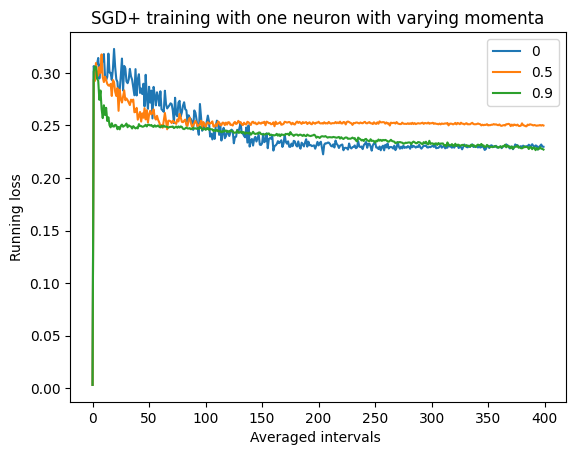

In [2]:
plt.plot(loss_0, label=0)
plt.plot(loss_5, label='0.5')
plt.plot(loss_9, label='0.9')
plt.legend()
plt.title("SGD+ training with one neuron with varying momenta")
plt.ylabel("Running loss")
plt.xlabel("Averaged intervals ")
plt.savefig('sgdp_one_neuron_059.png')